## Modelling and Diferential Equation Solving


Homework Guidelines:

1) Document your code! Only part of your score on the homework will be if you get the "right" answer. In order for us to understand what you've written, you need to have clearly written code. Documenting your code with comments (# sign) and spacing out your code (but not too much) makes it easier to read. You should also make use of the markdown feature of ipython notebooks for longer explanations or to imbed pictures/formulas.

2) You may google around for tools for solving the homework problems (StackExchange will often pop up!) but DO NOT google the exact problem statement or copy blocks of code from elsewhere.

3) You can work in small groups to complete assignments and share code within the small group. Please specify who you worked with if your submitted solutions are similar/identical.

4) Various python packages have built in routines for common programming tasks. If you want to use an external (i.e. import X) package which isn't imported in the problem statement please ask the instructor first.

5) Some problem statements might be vague or unspecific (like "Explore the relationship between X and Y"), just like real research questions! When in doubt it would be useful to provide plots and your observations. Show what you did graphically whenever possible.

6) Run all cells before you commit!


<em>Hit "Shift-Enter" on a code cell to evaluate it.  Double click a Markdown cell to edit. </em><br>

## Problem 1 - Monte Carlo Integration (10 Points)

Our first example of Monte Carlo technique in class was used to integrate a circle, in this exercise we will Monte Carlo a few more complex shapes...

a) Find the volume of the intersection of a sphere and a cylinder. The sphere has radius 1 and is centered at
the origin. The cylinder has radius 0.5, and its axis is perpendicular
to the x axis and goes through the point ( 0.5, 0, 0).  (The red region of the below shape.)

<html>
<img src="./problem1.png",width=300,height=300>
</html>

In [1]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

def in_sphere(x):
    # x is the vector of the point.
    # we use this function to judge whether the point is in the sphere or not.
    return np.dot(x, x) < 1

def in_cylinder(x):
    # x is the vector of the point.
    # we use this function to judge whether the point is in the cylinder or not.
    return (x[0]-0.5)**2 + x[1]**2 < 0.25

In [2]:
%pylab inline
# method 1 : randomly pick up point in the cube.
def Monte_Carlo_simulate(epoch = 10000):
    
    count = 0
    accept = []; reject = []
    
    for i in range(epoch):
        # select a point randomly in the cube which X,Y,Z are from -1 to 1.
        vec = [np.random.random() * 2 - 1 for i in range(3)]
        
        if(in_sphere(vec) and in_cylinder(vec)):
            count += 1
            accept.append(vec)
        else:
            reject.append(vec)
            
    accept = np.array(accept); reject = np.array(reject)
#     print(accept.shape, reject.shape)
#     print(accept[0][0])

    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(accept[:, 0], accept[:, 1], accept[:,2], color = 'red' , s = 1)
    ax.scatter(reject[:, 0], reject[:, 1], reject[:, 2], color = 'blue',s = 1)
    return count / epoch

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


1.1992


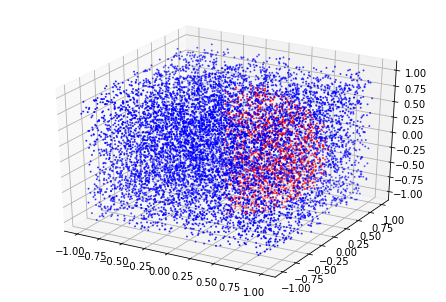

In [3]:
ans = Monte_Carlo_simulate() * 8
print(ans)

In [4]:
%pylab inline
# method 2 randomly pick up point in the sphere.
def Monte_Carlo_simulate(epoch = 10000):
    
    index, count = 0, 0
    accept = []; reject = []
    
    while(index < epoch):
        # select a point randomly in the cube which X,Y,Z are from -1 to 1.
        vec = [np.random.random() * 2 - 1 for i in range(3)]
        if(in_sphere(vec)):
            index += 1
            if(in_cylinder(vec)):
                count += 1 
                accept.append(vec)
            else:
                reject.append(vec)
        
    accept = np.array(accept); reject = np.array(reject)
#     print(accept.shape, reject.shape)
#     print(accept[0][0])

    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(accept[:, 0], accept[:, 1], accept[:,2], color = 'red' , s = 1)
#     ax.scatter(reject[:, 0], reject[:, 1], reject[:, 2], color = 'blue',s = 1)
    ax.set_xlim3d(-1, 1)
    ax.set_ylim3d(-1, 1)
    ax.set_zlim3d(-1, 1)
    return count / epoch

Populating the interactive namespace from numpy and matplotlib


1.2206134656747543


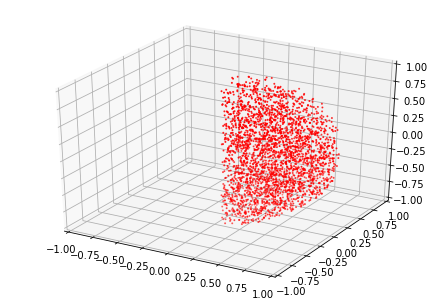

In [6]:
ans = Monte_Carlo_simulate() * (4 * np.pi / 3)
print(ans)

b) The volume of a unit circle is $\pi$ and the volume of a unit sphere is $\frac{4}{3}\pi$. What is the volume of a unit 6 dimensional sphere?

**solving process : **

After searching from the wikipedia, I got the formular to calculate the volume of a 6 dimensional sphere. The formula is as follows:
$$V(n) = \frac{\pi^{\frac{n}{2}}R^{n}}{\Gamma({\frac{n}{2} + 1})} \tag{1}$$

so the formular of a unit sphere is :
$$V = \frac{\pi^{3}}{6} \tag{2}$$

In [7]:
volume_six_dimension = np.pi ** 3 / 6

print("the volume of a unit 6 dimensional sphere is {}".format(volume_six_dimension))

the volume of a unit 6 dimensional sphere is 5.167712780049969


## Problem 2 - Nonlinear Pendulum (10 points)

The equation of motion for a point mass at the end of a massless and frictionless arm attached to a frictionless pivot can be written as

$$\frac{d^2\theta}{dt^2} = - \frac{g}{l} \sin(\theta)$$

Note that in your introductory physics class you mighth have solved this in the small $\theta$ limit where $\sin(\theta) \approx \theta$. In this case we will do the full wide angle solution.


a) Code up the solution to the nonlinear pendulum using odeint. Note you will have to use the trick mentioned in class of breaking up the second order equation into two first order equations. 

You can take the initial position as $\pi/3$, initial velocity as 0.01 meters/second, g as 9.8 meters/second^2, and the arm length as 1 meter.

## Mathematical derivation
learning from our descriptions, we get following core information.

$$
\left\{  
             \begin{array}{**lr**}  
             \frac{d^2\theta}{dt^2} = - \frac{g}{l} \sin(\theta) &  \\  
             \theta_0 = \pi/3, v_0 = 0.01, l = 1 &\\   
             \end{array}  \tag{1}
\right.  
$$
Then we change the formular to first order format.
$$
\left\{  
             \begin{array}{**lr**}  
             \frac{d\theta(t)}{dt} &= \omega(t) \\ 
             \frac{d\omega(t)}{dt} &= -\frac{g}{l}sin\theta(t)
             \end{array}  \tag{2}
\right.  
$$
so that we can use odeint to solve this problem.

In [8]:
import matplotlib.pylab as plt
from scipy.integrate import odeint

# parameter initialize 
g = 9.8
init_theta, init_velo, arm_length = np.pi / 3, 0.01, 1

def pendulum_equations(y, t, l):
    theta, w = y 
    dtheta, dw = w , -g * np.sin(theta) / l  
    return dtheta, dw

t = np.arange(0, 10, 0.001)

track = odeint(pendulum_equations, (init_theta, init_velo / arm_length), t, args=(arm_length,))


b) Plot the solution between t = 0 and t = 10 seconds.

Text(0.5, 1.0, 'motion track')

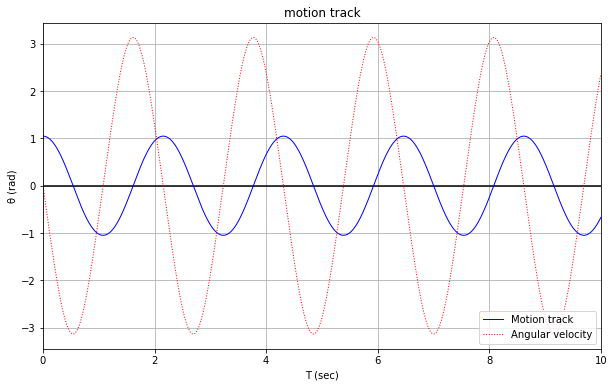

In [9]:
fig = plt.figure(figsize = (10, 6))
plt.plot(t, track[:,0], "b", label = "Motion track", linewidth = 1)
plt.plot(t, track[:,1], "r:", label = "Angular velocity", linewidth = 1)
plt.hlines(0, 0, 10, color = "black")
plt.xlim(0, 10)
plt.ylabel(r"θ (rad)")
plt.xlabel("T (sec)")
plt.legend(loc = 4)
plt.grid()
plt.title("motion track")

## Problem 3 - Trajectory with Air Resistance (15 points)

(From Nick Kern)

Consider a spherical cannonball shot from a cannon standing level with the ground. The trajectory without air resistance can be solved by-hand and resembles a parabola, using the equations of motion:

\begin{align}
\frac{dx}{dt} &= v_{x,0}\\
\\
\frac{d^{2}y}{dt^{2}} &= -g\\
\\
\frac{dy}{dt} &= \frac{d^2y}{dt^2}t + v_{y,0}
\end{align}

If we include air resistance, this changes. The force of air resistance can be written as

\begin{align}
F = \tfrac{1}{2}\pi R^2\rho C v^2
\end{align}

where $R$ is the sphere's radius, $\rho$ is the density of air, $v$ is the ball's velocity and $C$ is the coefficient of drag. Incorporating these into Newton's laws gives us equations of motion given as

\begin{align}
\ddot{x} &= -\frac{\pi R^2\rho C}{2m}\dot{x}\sqrt{\dot{x}^2+\dot{y}^2}\\
\\
\ddot{y} &= -g - \frac{\pi R^2\rho C}{2m}\dot{y}\sqrt{\dot{x}^2 + \dot{y}^2}
\end{align}

where $m$ is the mass of the ball, $g$ is the gravitational acceleration and $\dot{x}$ and $\ddot{x}$ are the first and second derivatives with respect to time.


a) Use odeint to solve the trajectory of $x(t)$ and $y(t)$ assuming $m = 1$ kg, $R = 0.08$ meters, the initial velocity is 100 meters sec$^{-1}$, the firing angle is $30^\circ$, the density of air is $\rho=1.22$kg m$^{-3}$, and the drag of a sphere has $C = 0.47$. 


In [13]:
from scipy import integrate
from scipy.integrate import odeint
%pylab inline

step = 0.001
p, C, g = 1.22, 0.47, 9.8
m, R, v0, angle = 1, 0.08, 100, np.pi/6

vx_0, vy_0 = v0 * cos(angle), v0 * sin(angle)


def Trajectory_equation(y, t, R, m, C):
    dx, dy = y
    ddx = -(pi * R**2 * p *C) / (2 * m) * dx * sqrt(dx**2 + dy **2)
    ddy = -g - (pi * R**2 * p *C) / (2 * m) * dy * sqrt(dx**2 + dy **2)
    return ddx, ddy

t = np.arange(0, 12, step)

Trajectory_trace = integrate.odeint(Trajectory_equation, (vx_0, vy_0), t, args=(R, m, C,))

X = [np.sum(Trajectory_trace[:n, 0]) * step for n,_ in enumerate(Trajectory_trace[:, 0])]     
Y = [np.sum(Trajectory_trace[:n, 1]) * step for n,_ in enumerate(Trajectory_trace[:, 1])]

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['step', 'angle']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


b) Plot the trajectory of $y(x)$. Does it look parabolic? Re-do the calculation with $C = 0.001$ and overplot that trajectory of $y(x)$ overtop. Does a sphere with air resistance travel farther or shorter than a sphere with no air resistance?


In [14]:
# calculate the trace with C = 0.001
Trajectory_trace_without = odeint(Trajectory_equation, (vx_0, vy_0), t, args = (R, m, 0.001))

X_without = [np.sum(Trajectory_trace_without[:n, 0]) * step for n,_ in enumerate(Trajectory_trace_without[:, 0])]
Y_without = [np.sum(Trajectory_trace_without[:n, 1]) * step for n,_ in enumerate(Trajectory_trace_without[:, 1])]

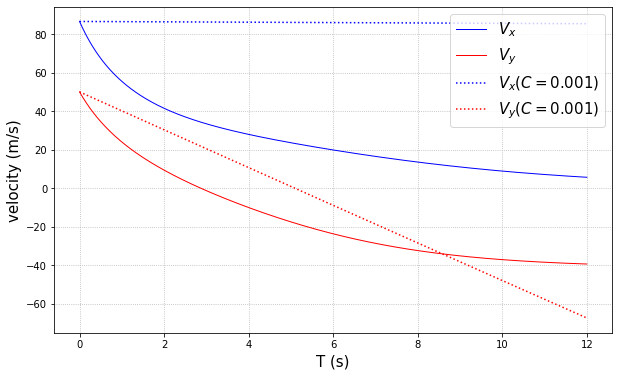

In [15]:
fig = plt.figure(figsize=(10, 6))
plt.plot(t, Trajectory_trace[:, 0], color = "blue", label = r"$V_x$", linewidth = 1)
plt.plot(t, Trajectory_trace[:, 1], color = "red", label = r"$V_y$", linewidth = 1)   
plt.plot(t, Trajectory_trace_without[:,0], "b:", label = r"$V_x (C = 0.001)$")
plt.plot(t, Trajectory_trace_without[:,1], "r:", label = r"$V_y (C = 0.001)$")
plt.ylabel("velocity (m/s)", fontsize = 15)
plt.xlabel("T (s)", fontsize = 15)
plt.legend(loc = 1, fontsize = 15)
plt.grid(linestyle = ':')

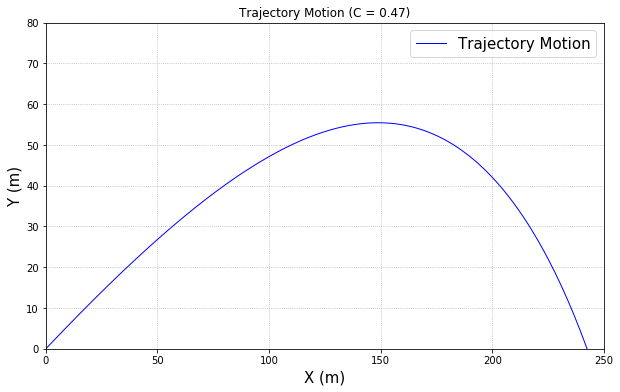

<Figure size 432x288 with 0 Axes>

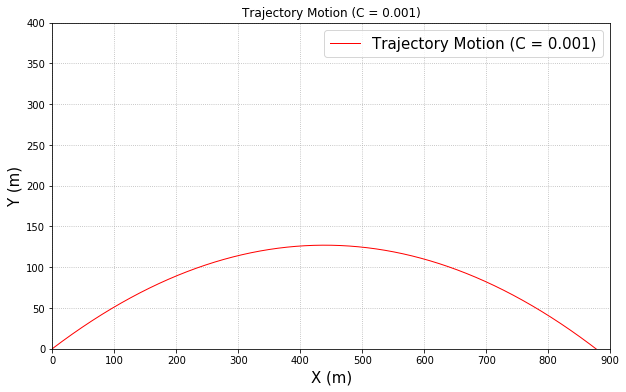

In [16]:
fig = plt.figure(figsize=(10, 6))
plt.title("Trajectory Motion (C = 0.47)")
plt.plot(X, Y, 'b', label = "Trajectory Motion", linewidth = 1)
plt.ylim(0, 80); plt.xlim(0, 250)
plt.xlabel("X (m)", fontsize = 15)
plt.ylabel("Y (m)", fontsize = 15)
plt.legend(loc = "best", fontsize = 15)
plt.grid(linestyle = ":")

plt.figure()
fig = plt.figure(figsize=(10, 6))
plt.title("Trajectory Motion (C = 0.001)")
plt.plot(X_without, Y_without, 'r', label = "Trajectory Motion (C = 0.001)", linewidth = 1)
plt.ylim(0, 400); plt.xlim(0, 900)
plt.xlabel("X (m)", fontsize = 15)
plt.ylabel("Y (m)", fontsize = 15)
plt.legend(loc = "best", fontsize = 15)
plt.grid(linestyle = ":")

c) Use an optimization method to figure out the best launch angle in order to travel the farthest distance, holding all other parameters fixed. You can choose your favorite method (first order, second order, anything in scipy.optimize, etc.)


In [17]:
from scipy.optimize import minimize
from scipy.integrate import odeint
import math
%pylab inline

def Distance(angle, v0 = 100, C = 0.47, R = 0.08, m = 1, method = "training"):
    '''training method won't paint the graph while others method do. '''
    # initialize the parameter
    Vx_0, Vy_0 = v0 * math.cos(angle), v0 * math.sin(angle)
    step = 0.001
    t =  np.arange(0, 12, step)
    max_distance = 0
    # calculate the trace 
    velocity = odeint(Trajectory_equation, [Vx_0, Vy_0], t, args=(R, m, C))
    # plot the velocity with the time
    if(method != "training"):
        fig = plt.figure(figsize=(10, 6))
        plt.plot(t, velocity[:, 0], color = "blue", label = r"$V_x$", linewidth = 1)
        plt.plot(t, velocity[:, 1], color = "red", label = r"$V_y$", linewidth = 1)   
    
        plt.ylabel("velocity (m/s)", fontsize = 15)
        plt.xlabel("T (s)", fontsize = 15)
        plt.legend(loc = 1, fontsize = 15)
        plt.grid(linestyle = ':')
        
    # calculate the X, Y with t
    X_t = [np.sum(velocity[:n, 0]) * step for n,_ in enumerate(velocity[:, 0])]
    Y_t = [np.sum(velocity[:n, 1]) * step for n,_ in enumerate(velocity[:, 1])]
    
    # calculate the distance using X_t, Y_t(calculate the 2th time when |Y - 0| < 0.01)
    flag = False
    for n, _ in enumerate(Y_t):
        if(abs(Y_t[n] - 0) < 0.1 and flag):
            max_distance = X_t[n]
            break
        if(abs(Y_t[n] - 0) > 0.1):
            flag = True
    if method != "training":
        # plot the graph X : X_t, Y : Y_t
        fig = plt.figure(figsize=(10, 6))
        plt.title("Trajectory Motion (C = {})".format(C))
        plt.plot(X_t, Y_t, 'b', label = "Trajectory Trace", linewidth = 1)
        plt.ylim(0, int(np.max(Y_t) / 50 + 1) * 50); plt.xlim(0, int(max_distance / 50 + 1) * 50)
        plt.xlabel("X (m)", fontsize = 15)
        plt.ylabel("Y (m)", fontsize = 15)
        plt.legend(loc = "best", fontsize = 15)
        plt.grid(linestyle = ":")
    
    return -max_distance

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['step', 'angle']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [18]:
# just using loop to solve the best angle pro
angle_list = np.linspace(0, pi / 2 , 1001)
distance_list = [Distance(angle_list[n]) for n,_ in enumerate(angle_list)]

print(angle_list[argmin(distance_list)], Distance(angle_list[argmin(distance_list)]))

0.603185789489 -244.627442892


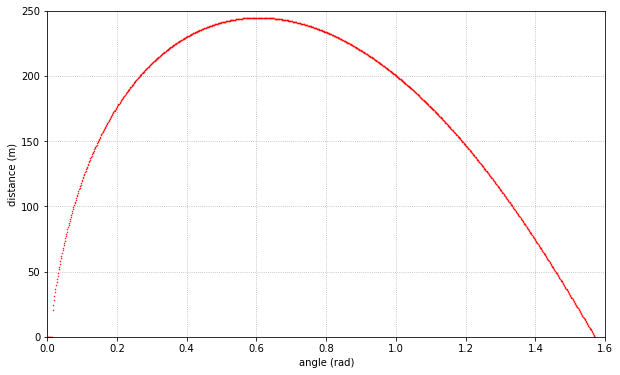

In [49]:
distance_list = np.array(distance_list)
fig = plt.figure(figsize=(10, 6))
plt.plot(angle_list, -1 * distance_list, "r.", ms = 1)
plt.xlim(0, 1.6); plt.ylim(0, 250)
plt.xlabel("angle (rad)"); plt.ylabel("distance (m)")
plt.grid(linestyle = ":")

In [20]:
# using scipy.odient to calculate the minimize of the funciton. 

init_angle = 0.1 * pi
ans = minimize(Distance, init_angle, method = "Nelder-Mead", options={'disp': True})

Optimization terminated successfully.
         Current function value: -244.629744
         Iterations: 25
         Function evaluations: 53


In [21]:
ans.x

array([ 0.60352844])

## Problem 4 - California Housing (15 Points)

Lets continue our exploration of the California Housing Data we used in class... Remember we need to do the following to load the dataset.

In [22]:
from sklearn import datasets
data = datasets.california_housing.fetch_california_housing()

In [23]:
print(data["DESCR"])

California housing dataset.

The original database is available from StatLib

    http://lib.stat.cmu.edu/datasets/

The data contains 20,640 observations on 9 variables.

This dataset contains the average house value as target variable
and the following input variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.

References
----------

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
Statistics and Probability Letters, 33 (1997) 291-297.




In [24]:
X = data["data"]

Y = data["target"]

a) Plot the home price vs each variale and perform a simple linear regression against each one. Which variable seems most important in determining home prices? Why?

(Note, it might be easier to use numpy or scipy instead of sklearn for this one.

In [28]:
import math
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from scipy.optimize import minimize

def error_rate(slope, num):
    return mean_squared_error(slope * X[:, num], Y)

In [40]:
clf = linear_model.LinearRegression()

def linear_regression(method = "scipy"):
    error_list =  []
    f, axes = plt.subplots(2, 4, figsize = (20, 10))   

    for i in range(2):
        for j in range(4):
            if(method == "sklearn"):
                clf.fit(X[:,4*i+j].reshape(-1, 1), Y)
                Y_lr_pred = clf.predict(X[:,4*i+j].reshape(-1, 1))
                error = mean_squared_error(Y_lr_pred, Y) 
                error_list.append(error)
            if(method == "scipy"):
                res = minimize(error_rate, 0, args=(4*i+j, ), method = "Nelder-Mead")
                slope = res.x[0]
                error_list.append(error_rate(slope, 4*i+j))
                
            t = np.linspace(np.min(X[:,4*i+j]), np.max(X[:,4*i+j]), 10000)
            
            # plot part 
            axes[i, j].set_title("price vs " + data.feature_names[4*i+j])
            axes[i, j].set_xlabel(data.feature_names[4*i+j], fontsize = 12)
            axes[i, j].set_ylabel("price", fontsize = 12) 

            axes[i, j].plot(X[:,4*i+j], Y, '.', color = "black", ms = 1, label = "true data")
            axes[i, j].plot(t, t * slope, "b", label = "fitting curve")
            
            axes[i, j].set_ylim(np.min(Y), np.max(Y))
            
            axes[i, j].grid(linestyle = ":")
            axes[i, j].legend()
            
    return error_list

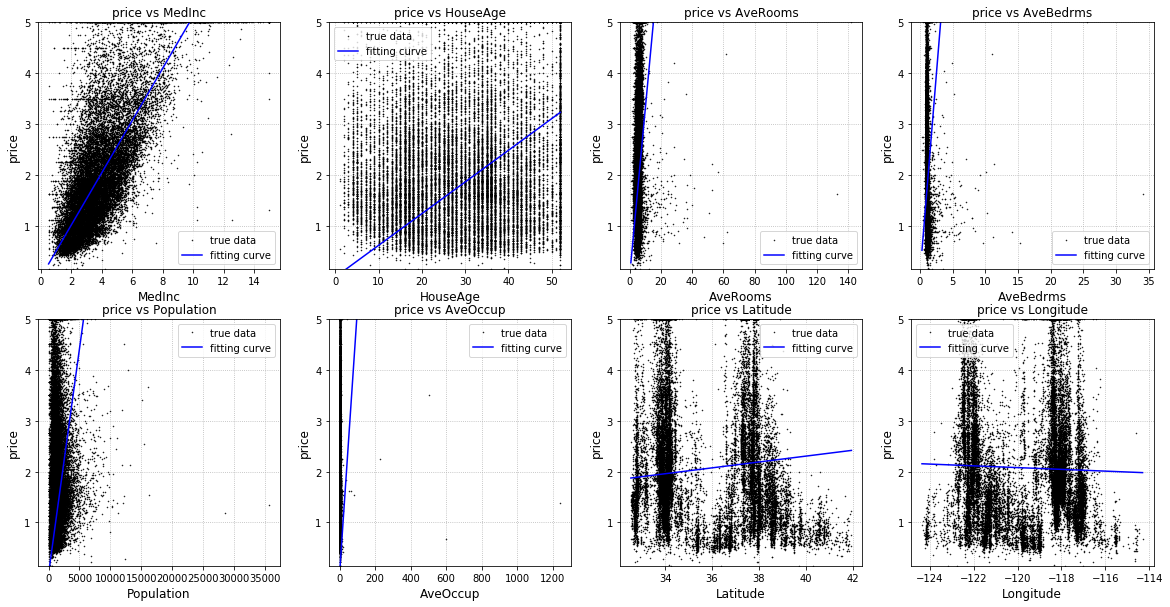

In [41]:
error_list = linear_regression()

most_important_index = np.argmin(error_list)

In [31]:
print("the most important attribute is {}, base on the result of linear model"
      .format(data.feature_names[most_important_index]))

the most important attribute is MedInc, base on the result of linear model


b) Split the data randomly into a test set and a train set. The training set should consist of 75% of all data, while the test set has the remaining 25%

## Using shuffle algorithm to solve the problem
what we do is just randomly shuffle the data and their labels and then select fisrt 3/4 data and their labels as train data, the other 1/4 data is the test data. 

In [32]:
import random 

# construct a shuffle of seq 0~len(Y), 
# former part use to train, else use to test.

sequenceList = np.arange(0, len(Y), 1)
random.shuffle(sequenceList)

# separate train data and test data.
train_data = np.array([X[i] for i in sequenceList[:15480]])
train_label = np.array([Y[i] for i in sequenceList[:15480]])
test_data = np.array([X[i] for i in sequenceList[15480:]])
test_label = np.array([Y[i] for i in sequenceList[15480:]])

In [33]:
print(train_data.shape, train_label.shape)
print(test_data.shape, test_label.shape)

(15480, 8) (15480,)
(5160, 8) (5160,)


c) Train a clustering algorithm as we did in class. Vary between 'uniform' and 'distance' for weights, and vary the number of nearest neighbors between 1 and 100. 

c1) For each type of weights make a plot of the Mean Squared Error as you vary the number of nearest neighbors used. Comment on the trends you see.

c2) For each type of weights make a plot of the time it takes the algorithm to train (i.e. the time the "fit" command takes) as you vary the number of nearest neighbors used.

In [34]:
import time
from sklearn import neighbors
from sklearn import preprocessing

n_neighbor = np.arange(1, 101, 1)
X_scale = preprocessing.scale(train_data)

time_counter = {"uniform" : [], "distance" : []} 
mse_list = {"uniform" : [], "distance" : []} 

for weight in ["uniform" , "distance"]:
    for k in n_neighbor:
        # initialize the model
        clf = neighbors.KNeighborsRegressor(n_neighbors=k, weights=weight)
        
        # training and count the time.
        start_time = time.clock()
        clf.fit(X_scale, train_label)
        end_time = time.clock()
        time_counter[weight].append(end_time - start_time)
        
        # prediction 
        Y_Knn_predict = clf.predict(test_data)
        mse = mean_squared_error(Y_Knn_predict, test_label)
        mse_list[weight].append([k, mse])

In [35]:
mse_list["uniform"] = np.array(mse_list["uniform"])
mse_list["distance"] = np.array(mse_list["distance"])
time_counter["uniform"] = np.array(time_counter["uniform"])
time_counter["distance"] = np.array(time_counter["distance"])

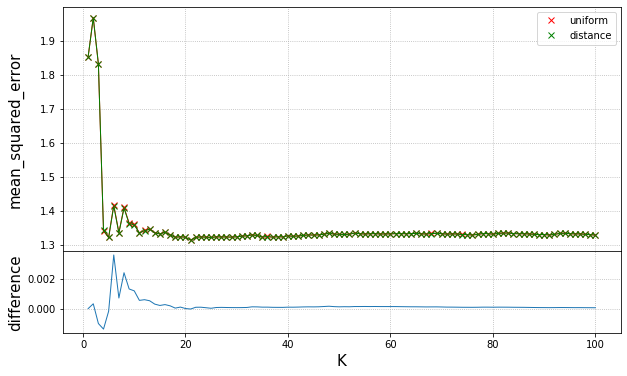

In [36]:
from matplotlib.gridspec import GridSpec
fig = plt.figure(figsize=(10, 6))
gs = GridSpec(4, 4)
plt.subplots_adjust(hspace=0)

ax1 = plt.subplot(gs[:3,:])
plt.ylabel("mean_squared_error", fontsize = 15)
plt.plot(n_neighbor, mse_list["uniform"][:,1], "rx", label = "uniform")
plt.plot(n_neighbor, mse_list["distance"][:,1], "gx", label = "distance")
plt.plot(n_neighbor, mse_list["uniform"][:,1], "r",linewidth = 1)
plt.plot(n_neighbor, mse_list["distance"][:,1], "g",linewidth = 1)
plt.grid(linestyle = ":"); ax1.legend()

ax2 = plt.subplot(gs[3,:], sharex=ax1)
plt.plot(n_neighbor, mse_list["uniform"][:,1] - mse_list["distance"][:,1], linewidth = 1)
plt.grid(linestyle = ":"); ax1.legend()
ax2.set_ylabel("difference", fontsize=15)
ax2.set_xlabel("K", fontsize=15)

# align labels
fig.align_labels()

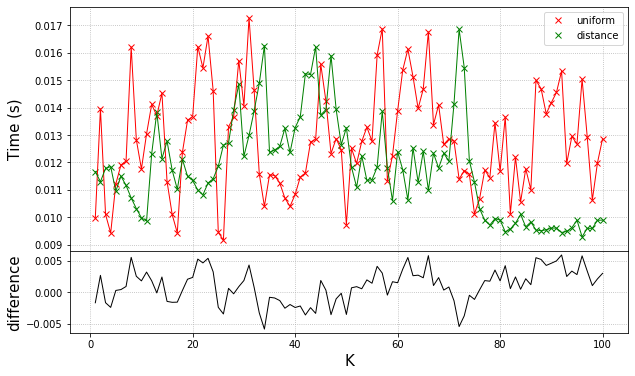

In [39]:
fig = plt.figure(figsize=(10, 6))
gs = GridSpec(4, 4)
plt.subplots_adjust(hspace=0)

ax1 = plt.subplot(gs[:3,:])
plt.ylabel("Time (s)", fontsize = 15)
plt.plot(n_neighbor, time_counter["uniform"], "rx", label = "uniform")
plt.plot(n_neighbor, time_counter["distance"], "gx", label = "distance")
plt.plot(n_neighbor, time_counter["uniform"], "r",linewidth = 1)
plt.plot(n_neighbor, time_counter["distance"], "g",linewidth = 1)
plt.grid(linestyle = ":"); ax1.legend()

ax2 = plt.subplot(gs[3,:], sharex=ax1)
plt.plot(n_neighbor, time_counter["uniform"] - time_counter["distance"], color = "black",linewidth = 1)       
plt.grid(linestyle = ":"); ax1.legend()
ax2.set_ylabel("difference", fontsize=15)
ax2.set_xlabel("K", fontsize=15)

# align labels
fig.align_labels()